<a href="https://colab.research.google.com/github/apoorva14-unique/IML-PA/blob/main/project_code_in_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully
   S.NO    MANDAL NAME VILLAGE NAME  SOIL TYPE    PH    EC    OC      N  P2O5  \
0     1  JAMMALAMADUGU   Uppalapadu          1  8.01  0.12  0.23  150.0    14   
1     2  JAMMALAMADUGU   Uppalapadu          1  7.96   0.1  0.07  226.0    55   
2     3  JAMMALAMADUGU   moragudi-1          2  8.03  0.08  0.20  276.0     8   
3     4  JAMMALAMADUGU   moragudi-1          1  8.40  0.06  0.15  213.0    30   
4     5  JAMMALAMADUGU   moragudi-2          1  7.99  0.04  0.27  250.0    13   

   K20   S     CU     FC     MN     ZN     BA  Temparature  Humidity  \
0  270   7  0.030  16.72  16.69  1.320  0.256        34.59      77.4   
1  290   8  2.286  12.21  15.07  1.108   3.84        34.59      77.4   
2  574  14  2.566  3.564  15.63  0.990  0.192        34.59      77.4   
3  243  20  2.028    2.5  11.33  1.114   0.16        34.59      77.4   
4  486  14  1.664  1.498  13.12  0.938  0.512        34.59      77.4   

   Rainfall        CROP  
0     834.3      cotton  


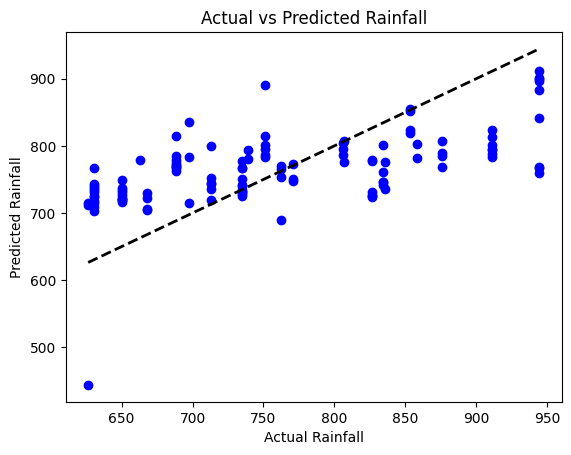

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load the dataset
file_path = 'complete soil data.csv'  # Replace with actual path
data = pd.read_csv(file_path)

print("Dataset loaded successfully")

# Display dataset preview and columns
print(data.head())
print("\nDataset Columns:", data.columns)

# Convert all columns (except non-numeric ones) to numeric format
non_numeric_cols = ['S.NO', 'MANDAL NAME']  # Update if needed
for col in data.columns:
    if col not in non_numeric_cols:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Select features and target variable
features = ['PH', 'EC', 'OC', 'N', 'P2O5', 'K20', 'S', 'CU', 'FC', 'MN', 'ZN', 'BA', 'Temparature', 'Humidity']
X = data[features]
y = data['Rainfall']

# --- Added code to handle NaN values ---
# Combine features and target into a single DataFrame to drop rows consistently
combined_data = pd.concat([X, y], axis=1)

# Drop rows with any NaN values in the combined data
data_cleaned = combined_data.dropna()

# Separate the cleaned data back into features and target
X_cleaned = data_cleaned[features]
y_cleaned = data_cleaned['Rainfall']

print(f"\nOriginal data shape: {data.shape}")
print(f"Cleaned data shape after dropping NaNs: {data_cleaned.shape}")
# --- End of added code ---

# Split dataset into training and testing sets using the cleaned data
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Create and train Linear Regression model using cleaned data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Regression Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

# Visualization - Actual vs Predicted
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Actual vs Predicted Rainfall')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Reference diagonal
plt.show()

   S.NO    MANDAL NAME VILLAGE NAME  SOIL TYPE    PH    EC    OC      N  P2O5  \
0     1  JAMMALAMADUGU   Uppalapadu          1  8.01  0.12  0.23  150.0    14   
1     2  JAMMALAMADUGU   Uppalapadu          1  7.96   0.1  0.07  226.0    55   
2     3  JAMMALAMADUGU   moragudi-1          2  8.03  0.08  0.20  276.0     8   
3     4  JAMMALAMADUGU   moragudi-1          1  8.40  0.06  0.15  213.0    30   
4     5  JAMMALAMADUGU   moragudi-2          1  7.99  0.04  0.27  250.0    13   

   K20   S     CU     FC     MN     ZN     BA  Temparature  Humidity  \
0  270   7  0.030  16.72  16.69  1.320  0.256        34.59      77.4   
1  290   8  2.286  12.21  15.07  1.108   3.84        34.59      77.4   
2  574  14  2.566  3.564  15.63  0.990  0.192        34.59      77.4   
3  243  20  2.028    2.5  11.33  1.114   0.16        34.59      77.4   
4  486  14  1.664  1.498  13.12  0.938  0.512        34.59      77.4   

   Rainfall        CROP  
0     834.3      cotton  
1     834.3      cotton  
2 

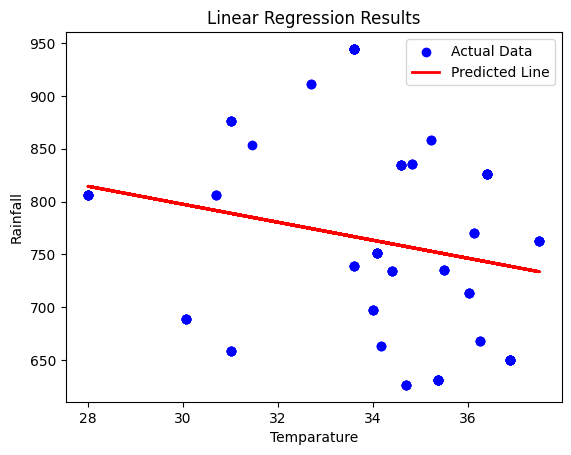

In [15]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
# Replace 'your_dataset.csv' with your actual file path or URL
url = 'complete soil data.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

# Define the features (X) and the target variable (y)
# For example, if you want to predict 'Rainfall' based on 'Temperature'
X = data[['Temparature']]  # Independent variable(s)
y = data['Rainfall']  # Dependent variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Plotting the results
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.title('Linear Regression Results')
plt.xlabel('Temparature')
plt.ylabel('Rainfall')
plt.legend()
plt.show()